In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import seaborn as sns


In [3]:
titanic = pd.read_csv("/content/sample_data/titanic.csv")

In [4]:
titanic.head()

,Name,Sex,Age,Pclass,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,"Karaic, Mr. Milan",male,30.0,3,0,0,349246,7.8958,NaN,S,0
1,"Dean, Mrs. Bertram",female,33.0,3,1,2,C.A. 2315,20.5750,NaN,S,1
2,"Rice, Mrs. William",female,39.0,3,0,5,382652,29.1250,NaN,Q,0
3,"Davidson, Mrs. Thornton",female,27.0,1,1,2,F.C. 12750,52.0000,B71,S,1
4,"Ridsdale, Miss. Lucy",female,50.0,2,0,0,W./C. 14258,10.5000,NaN,S,1


**Preliminary analysis**

How many rows are there?

How many columns are there?

In [6]:
titanic.shape

(1309, 11)

What type is each variable (column)?

In [8]:
titanic.dtypes

Name         object
Sex          object
Age         float64
Pclass        int64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
Survived      int64
dtype: object

Are there null values?

In [10]:
titanic.isnull().values.any()

True

In [11]:
titanic.isna()

,Name,Sex,Age,Pclass,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1304,False,False,False,False,False,False,False,False,True,False,False
1305,False,False,False,False,False,False,False,False,True,False,False
1306,False,False,False,False,False,False,False,False,True,False,False
1307,False,False,False,False,False,False,False,False,True,False,False


In [12]:
titanic.isnull().values.sum()

1280

In [13]:
titanic['Cabin'].isnull().sum()

1014

In [14]:
titanic['Sex'].isnull().sum()

0

In [15]:
titanic['Name'].isnull().sum()

0

In [17]:
titanic['Age'].isnull().sum()

263

In [18]:
titanic.dropna()

,Name,Sex,Age,Pclass,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
3,"Davidson, Mrs. Thornton",female,27.0,1,1,2,F.C. 12750,52.0000,B71,S,1
5,"Douglas, Mrs. Frederick Charles",female,27.0,1,1,1,PC 17558,247.5208,B58 B60,C,1
11,"Taussig, Mrs. Emil",female,39.0,1,1,1,110413,79.6500,E67,S,1
30,"Newell, Miss. Marjorie",female,23.0,1,1,0,35273,113.2750,D36,C,1
31,"Duff Gordon, Sir. Cosmo Edmund",male,49.0,1,1,0,PC 17485,56.9292,A20,C,1
...,...,...,...,...,...,...,...,...,...,...,...
1271,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,1,0,17765,27.7208,D40,C,1
1280,"Wilson, Miss. Helen Alice",female,31.0,1,0,0,16966,134.5000,E39 E41,C,1
1281,"Kent, Mr. Edward Austin",male,58.0,1,0,0,11771,29.7000,B37,C,0
1283,"Keeping, Mr. Edwin",male,32.5,1,0,0,113503,211.5000,C132,C,0


**UNIVARIATE ANALYSIS**

In [19]:
titanic.sample(10) #random sampling

,Name,Sex,Age,Pclass,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
462,"Howard, Miss. May Elizabeth",female,NaN,3,0,0,A. 2. 39186,8.0500,NaN,S,1
1119,"Webber, Mr. James",male,NaN,3,0,0,SOTON/OQ 3101316,8.0500,NaN,S,0
1272,"Leyson, Mr. Robert William Norman",male,24.0,2,0,0,C.A. 29566,10.5000,NaN,S,0
1120,"Mannion, Miss. Margareth",female,NaN,3,0,0,36866,7.7375,NaN,Q,1
93,"Coelho, Mr. Domingos Fernandeo",male,20.0,3,0,0,SOTON/O.Q. 3101307,7.0500,NaN,S,0
774,"Emanuel, Miss. Virginia Ethel",female,5.0,3,0,0,364516,12.4750,NaN,S,1
493,"Cor, Mr. Ivan",male,27.0,3,0,0,349229,7.8958,NaN,S,0
1295,"Marvin, Mr. Daniel Warner",male,19.0,1,1,0,113773,53.1000,D30,S,0
310,"Daniel, Mr. Robert Williams",male,27.0,1,0,0,113804,30.5000,NaN,S,1
317,"Sage, Master. Thomas Henry",male,NaN,3,8,2,CA. 2343,69.5500,NaN,S,0


How was survival?

In [21]:
titanic.Survived.value_counts()

0    809
1    500
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

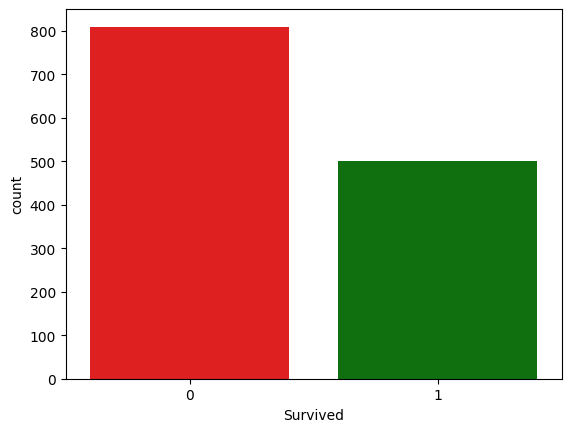

In [22]:
sns.countplot(x=titanic.Survived, palette=["red", "green"])

How does the fare price distribute? #measuring central tendency

In [23]:
titanic.Fare.mean().round(1)

33.3

In [27]:
titanic.Fare.median().round(1) #value lying in the middle of the dataset

14.5

In [26]:
titanic.Fare.mode() #most commonly observed value

0    8.05
Name: Fare, dtype: float64

Measures of spread

In [30]:
titanic.Fare.min()

0.0

In [31]:
titanic.Fare.max()

512.3292

In [35]:
titanic.Fare.std() #standard deviation: measures the dispersion of a data set relative to its mean

51.75866823917411

In [48]:
def range():                                      #why no output
 return titanic.Fare.max() - titanic.Fare.min()


plotting a histogram to see fare distribution

<Axes: xlabel='Fare', ylabel='Count'>

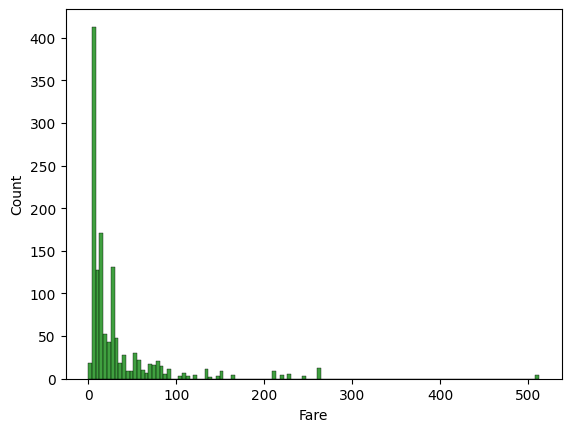

In [52]:
sns.histplot(x=titanic.Fare, color = 'green')

**Two-dimensional analysis**

How does fare price correlate with survival rate?

<Axes: xlabel='Fare', ylabel='Density'>

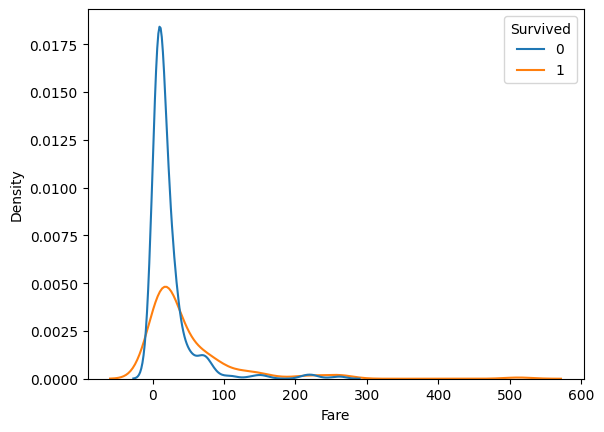

In [53]:
sns.kdeplot(x=titanic.Fare, hue=titanic.Survived)

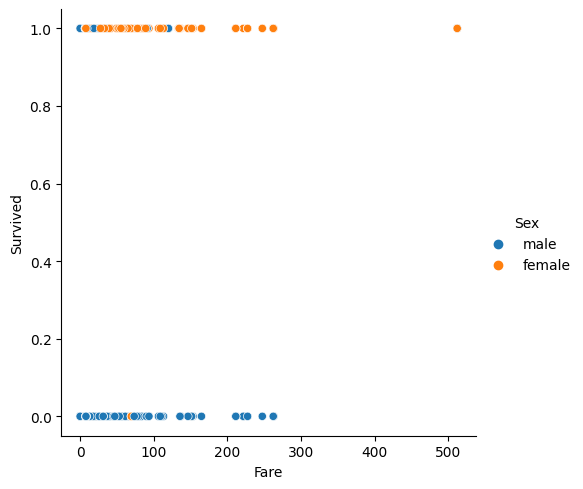

In [56]:
sns.relplot(data=titanic, x="Fare", y="Survived", hue="Sex")

Hence, females who paid higher amount of fares survuved better than men who paid higher amount for the tickets.

How does survival relate with class?

In [57]:
pd.crosstab(titanic.Pclass, titanic.Survived)

Survived,0,1
Pclass,,
1,123,200
2,158,119
3,528,181


<Axes: xlabel='Pclass', ylabel='count'>

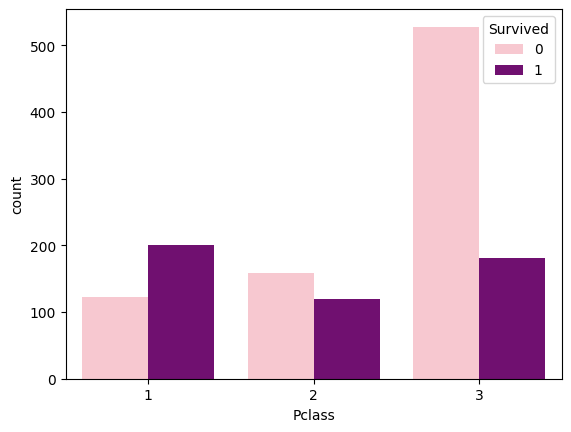

In [58]:
sns.countplot(hue=titanic.Survived, x=titanic.Pclass, palette=["Pink", "purple"])

How does survival relate with sex?

In [59]:
pd.crosstab(titanic.Sex, titanic.Survived)

Survived,0,1
Sex,,
female,127,339
male,682,161


<Axes: xlabel='Sex', ylabel='count'>

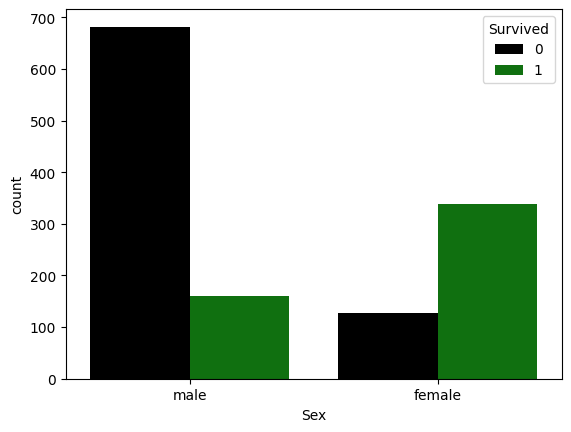

In [61]:
sns.countplot(hue=titanic.Survived, x=titanic.Sex, palette=["black", "green"])